This notebook refers to the manuscript "Bose-Einstein statistics for a finite number of particles". 

Here you can see the code that generates figures 1, 2, 3, and 5. For finite $N$, this is done by using the IGQG functions ``xi`` that calculates $\xi(\beta,N)$ -- numerically inverting eq (13a)  in the manuscript. In the thermodynamical limit this is done by the IGQG function ``xiTL`` -- which obtains $\tilde{\xi}(\beta)$ inverting Eq (19) in the manuscript.

The calculation for the fraction of the particles in the ground state $\frac{n_0}{N}$, specific heat $c_v$, and the quantity $\frac{1}{k_B^2  \beta} \left(\frac{\partial{c}_v}{\partial{T}}\right)_{N,\kappa} $ are given by the functions defined in this notebook: ``fraction``, ``cv``, and ``dcvdtob``, respetively. The equivalent quantities for the thermodynamical limit are calculated directly in ``IN 9`` of this notebook. 

In [1]:
from IGQG import *
import numpy as np
mp.dps = 50

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
eta = power(2,-1) 
betaratio = np.concatenate([np.array([1e-4]),np.arange(0.1,.5,.025),np.arange(.5,.9,0.01),np.arange(.9,1.05,.001),np.arange(1.05,1.2,.01),np.arange(1.2,2,.025)])
ns = [power(10,i) for i in range(2,8)]
ls = ['dashed',(0,(6,1,1,1)),'dotted',(0, (5, 1)),'dashdot',(0, (5, 3))]

#eta =2
#eta =power(2,-2)

<b>Part 1: Calculations for finite N </b>

In [3]:
xilist=[]
for N in ns:
    betacritical = power(gamma(eta+1)*(1/N)*zeta(eta+1),1/(eta+1))
    beta = betacritical*betaratio
    xiarray=xi(beta,eta,N)
    xilist.append(xiarray)

In [4]:
def fraction(xiarray,N):
    #return 1 - (fpolylog(eta+1,xiarray)/zeta(eta+1))*betaratio**(-eta-1)
    return xiarray/(1-xiarray)/N

In [5]:
def dxidb(xiarray,beta):
    num = gamma(eta+2)*(beta**(-eta-2))*fpolylog(eta+1,xiarray)
    den = gamma(eta+1)*(beta**(-eta-1))*fpolylog(eta,xiarray)/xiarray + (1-xiarray)**-2
    return num/den

def cv(xiarray,beta,N):
    fd = dxidb(xiarray,beta)
    dudb= gamma(eta+2)*(beta**(-eta-3))*(-(eta+2)*fpolylog(eta+2,xiarray) + (beta/xiarray)*fd*(fpolylog(eta+1,xiarray)))
    return-(beta**2)*dudb/N    

In [6]:
def d2xidb2(xiarray,beta):
    fd = dxidb(xiarray,beta)
    numt1 = gamma(eta+3)*(beta**(-eta-3))*fpolylog(eta+1,xiarray)
    numt2 = -fd*2*gamma(eta+2)*(beta**(-eta-2))*fpolylog(eta,xiarray)/xiarray
    numt3 = (fd**2)*(gamma(eta+1)*(beta**(-eta-1))*(fpolylog(eta-1,xiarray)-fpolylog(eta,xiarray))*xiarray**(-2) 
                    +2*(1-xiarray)**(-3))
    den = gamma(eta+1)*(beta**(-eta-1))*fpolylog(eta,xiarray)/xiarray + (1-xiarray)**(-2)
    return -(numt1+numt2+numt3)/den

def dcvdtob(xiarray,beta,N):
    fd = dxidb(xiarray,beta)
    fd2 = d2xidb2(xiarray,beta)
    t1 = -(eta+2)*(eta+1)*fpolylog(eta+2,xiarray)
    t2 = fd*(beta/xiarray)*2*(eta+1)*fpolylog(eta+1,xiarray)
    t3 = -((fd*(beta/xiarray))**2)*(fpolylog(eta,xiarray)-fpolylog(eta+1,xiarray))
    t4 = -(fd2*beta*beta/xiarray)*fpolylog(eta+1,xiarray)
    dcvob = gamma(eta+2)*beta**(-eta-2)*(t1+t2+t3+t4)
    return -beta*dcvob/N  

In [7]:
fractionlist,cvlist,dcvdtoblist = [],[],[]
for i in range(len(xilist)):
    N,xiarray = ns[i],xilist[i]
    betacritical = power(gamma(eta+1)*(1/N)*zeta(eta+1),1/(eta+1))
    beta = betacritical*betaratio
    fracarray = fraction(xiarray,N)
    fractionlist.append(fracarray)
    cvarray = cv(xiarray,beta,N)
    cvlist.append(cvarray)
    dcvdtobarray = dcvdtob(xiarray,beta,N)
    dcvdtoblist.append(dcvdtobarray)                                                                         

<b> Part 2: Calculation in the Thermodynamical limit </b>

In [8]:
lowratio = betaratio[betaratio<1]
highratio = betaratio[betaratio>=1]
lowxi = xiTL(lowratio,eta)

In [9]:
fraclim = np.maximum(np.zeros(len(betaratio)),1 - betaratio**(-eta-1))

cvlow = (eta+1)*(eta+2)*(fpolylog(eta+2,lowxi)/fpolylog(eta+1,lowxi)) - (eta+1)*(eta+1)*(fpolylog(eta+1,lowxi)/fpolylog(eta,lowxi))
cvlarge = (eta+2)*(eta+1)*(zeta(eta+2)/zeta(eta+1))*highratio**(-eta-1)

dcvlow = (eta+1)*(eta+1)*(eta+2)*(fpolylog(eta+2,lowxi)/fpolylog(eta+1,lowxi)) - (eta+1)*(eta+1)*(fpolylog(eta+1,lowxi)/fpolylog(eta,lowxi))- (eta+1)*(eta+1)*(eta+1)*(fpolylog(eta+1,lowxi)**2)*fpolylog(eta-1,lowxi)*(fpolylog(eta,lowxi)**(-3))
dcvlarge = (eta+2)*(eta+1)*(eta+1)*(zeta(eta+2)/zeta(eta+1))*highratio**(-eta-1)

<b>Part 3: Graphs</b>

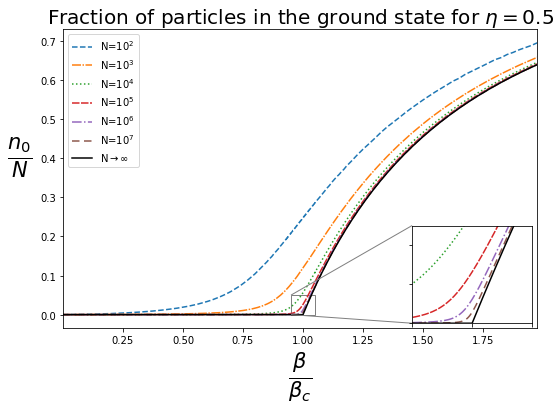

In [10]:
fig,ax = plt.subplots(figsize=(8.5,5.5))
axins = zoomed_inset_axes(ax, 5, loc='lower right') 

for i in range(len(fractionlist)):
    ax.plot(betaratio,fractionlist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    axins.plot(betaratio,fractionlist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    
ax.plot(betaratio,fraclim,label=r'N$\rightarrow \infty$',color='black')
axins.plot(betaratio,fraclim,label=r'N$\rightarrow \infty$',color='black')
    
ax.set_xlim(betaratio.min(),betaratio.max())
ax.legend(loc='upper left')
ax.set_xlabel(r'$\frac{\beta}{\beta_c}$',size=30)
ax.set_ylabel(r'$\frac{n_0}{N}$    ',size=30,rotation=0)

axins.set_xlim(.95, 1.05)
axins.set_ylim(0, .05)

plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
    
ax.legend()
ax.set_title(r'Fraction of particles in the ground state for $\eta={}$'.format(eta), fontsize=20)
plt.savefig('fraction-eta{}.png'.format(eta), bbox_inches = "tight",dpi=600)
plt.show()

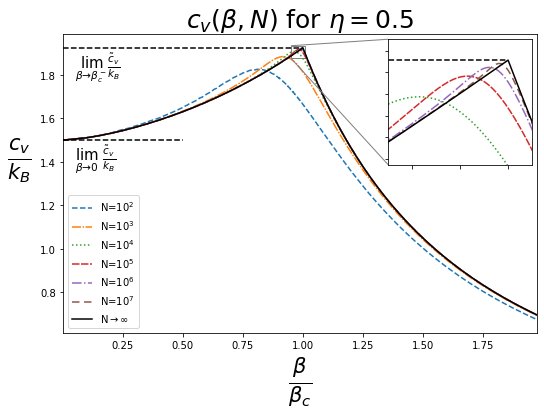

In [11]:
fig,ax = plt.subplots(figsize=(8.5,5.5))

if eta>1:
    axins = zoomed_inset_axes(ax, 7.5, loc='upper right') 
    axins.set_xlim(.99, 1.03)
    axins.set_ylim(float(cvlarge[0])*.92,float(cvlarge[0])*1.005 )
elif eta<.49:
    axins = zoomed_inset_axes(ax, 20, loc='upper right') 
    axins.set_xlim(.98, 1.01)
    axins.set_ylim(float(cvlarge[0])*.99,float(cvlarge[0])*1.01 )
    
else:
    axins = zoomed_inset_axes(ax, 10, loc='upper right') 
    axins.set_xlim(.95, 1.01)
    axins.set_ylim(float(cvlarge[0])*.975,float(cvlarge[0])*1.005 )
    
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

for i in range(len(cvlist)):
    ax.plot(betaratio,cvlist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    axins.plot(betaratio,cvlist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    
if eta>1:
    ax.plot(lowratio,cvlow,color='black',label=r'N$\rightarrow \infty$')
    ax.plot(highratio,cvlarge,color='black')
    axins.plot(highratio,cvlarge,color='black')
    cvmax = (eta+2)*(eta+1)*(zeta(eta+2)/zeta(eta+1))-(eta+1)*(eta+1)*(zeta(eta+1)/zeta(eta))+0*lowratio
else:
    ax.plot(betaratio,np.concatenate([cvlow,cvlarge]),color='black',label=r'N$\rightarrow \infty$')
    axins.plot(betaratio,np.concatenate([cvlow,cvlarge]),color='black')
    cvmax = (eta+2)*(eta+1)*(zeta(eta+2)/zeta(eta+1))+0*lowratio
cvmin = eta+1+0*lowratio

ax.text(.05,cvmax[1]-.01,r'$\lim_{\beta \to \beta_c^-}  \frac{\tilde{c}_v}{k_B}$',va='top',fontsize=15)
ax.plot(lowratio,cvmax,linestyle='dashed',color='black')
axins.plot(lowratio,cvmax,linestyle='dashed',color='black')

ax.text(.05,cvmin[1]-.01,r'$\lim_{\beta \to 0}  \ \frac{\tilde{c}_v}{k_B}$',va='top',fontsize=15)
ax.plot(lowratio/2,cvmin,linestyle='dashed',color='black')


ax.set_xlim(betaratio.min(),betaratio.max())
ax.set_xlabel(r'$\frac{\beta}{\beta_c}$',size=30)
ax.set_ylabel(r'$\frac{c_v}{k_B}$    ',size=30,rotation=0)



ax.set_title(r'$c_v(\beta,N)$ for $\eta={}$'.format(eta), fontsize=25)
ax.legend(loc='lower left')
plt.savefig('c_v-eta{}.png'.format(eta), bbox_inches = "tight",dpi=600)
plt.show()



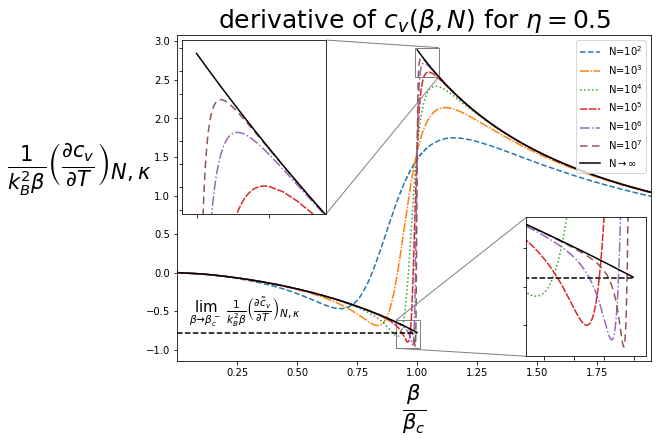

In [12]:
fig,ax = plt.subplots(figsize=(8.5,6))
axins = zoomed_inset_axes(ax, 6, loc='upper left') 

limited = eta==power(2,-1)
if limited:
    axins2 = zoomed_inset_axes(ax, 5, loc='lower right') 
for i in range(len(dcvdtoblist)):
    ax.plot(betaratio,dcvdtoblist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    axins.plot(betaratio,dcvdtoblist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    if limited:
        axins2.plot(betaratio,dcvdtoblist[i],label=r'N=$10^{}$'.format(int(mp.log10(ns[i]))),linestyle=ls[i])
    
    
axins.set_xlim(.99, 1.09)
axins.set_ylim(float(dcvlarge[0])*.88,float(dcvlarge[0])*1.01 )

plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")


dcvmin = 0*lowratio#+(eta+2)*(eta+1)*(eta+1)-(eta+1)*(eta+1)-((eta+1)**3)
plt.plot(lowratio/2,dcvmin,linestyle='dashed',color='black')
if limited:
    ax.plot(lowratio,dcvlow,color='black',label=r'N$\rightarrow \infty$')
    axins2.plot(lowratio,dcvlow,color='black',label=r'N$\rightarrow \infty$')
    ax.plot(highratio,dcvlarge,color='black')
    axins.plot(highratio,dcvlarge,color='black')
    dcvmax = 0*lowratio+(eta+2)*(eta+1)*(eta+1)*(zeta(eta+2)/zeta(eta+1))-(eta+1)*(eta+1)*(zeta(eta+1)/fpolylog(eta,1-power(10,-20)))-((eta+1)**3)*((zeta(eta+1)**2)*(fpolylog(eta-1,1-power(10,-20))/(fpolylog(eta,1-power(10,-20))**3)))
    ax.text(.05,dcvmax[1]+.05,r'$\lim_{\beta \to \beta_c^-} \ \frac{1}{k_B^2  \beta} \left( \frac{\partial \tilde{c}_v}{\partial T}\right)_{N,\kappa}$',va='bottom',fontsize=15)
    ax.plot(lowratio,dcvmax,linestyle='dashed',color='black')
    axins2.plot(lowratio,dcvmax,linestyle='dashed',color='black')

    
else:
    if eta>.5:
        ax.plot(lowratio,dcvlow,color='black',label=r'N$\rightarrow \infty$')
        ax.plot(highratio,dcvlarge,color='black')
        axins.plot(highratio,dcvlarge,color='black')
        ax.set_ylim(-float(dcvlarge[0]),1.05*float(dcvlarge[0]))
        axins.set_xlim(.99, 1.05)
        axins.set_ylim(float(dcvlarge[np.argmin(abs(highratio-1.05))]),float(dcvlarge[0])*1.01 )
    else:
        ax.plot(betaratio,np.concatenate([dcvlow,dcvlarge]),color='black',label=r'N$\rightarrow \infty$')
        axins.plot(betaratio,np.concatenate([dcvlow,dcvlarge]),color='black')
        ax.set_ylim(3*float(dcvdtoblist[0].min()),1.25*float(dcvlarge[0]))
        xc=float(betaratio[dcvdtoblist[-1].argmax()])
        axins.set_xlim(2.5*xc-1.5, 2-xc)
        axins.set_ylim(float(dcvdtoblist[-1].max())*.94,float(dcvdtoblist[-1].max())*1.01 )
            
ax.set_xlim(betaratio.min(),betaratio.max())
ax.set_xlabel(r'$\frac{\beta}{\beta_c}$',size=30)
ax.set_ylabel(r'$\frac{1}{k_B^2  \beta} \left( \frac{\partial c_v}{\partial T}\right)_{N,\kappa}$              ',size=30,rotation=0)


if limited:
    axins2.set_xlim(.91, 1.01)
    axins2.set_ylim(float(1.025*dcvdtoblist[-1].min()),.8*float(dcvlow.min()))

    plt.xticks(visible=False)
    plt.yticks(visible=False)
    mark_inset(ax, axins2, loc1=2, loc2=3, fc="none", ec="0.5")

ax.set_title(r'derivative of $c_v(\beta,N)$ for $\eta={}$'.format(eta), fontsize=25)
ax.legend(loc='upper right')
plt.savefig('dc_v-eta{}.png'.format(eta), bbox_inches = "tight",dpi=600)
plt.show()